#Distributed_QLearning_Algorithm

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# SINR_X_UL
def SINR_X_UL(P_SU):  
  # if (np.sum(P_SU) == 0 ):
  #   print("P_SU:", P_SU)
  return 90 - np.sum(P_SU)

# Costs
def cost(SINR_ij,SINR_th):
  return (SINR_ij - SINR_th)**2


def cost_abs(SINR_ij,SINR_th):
    return abs(SINR_ij - SINR_th)


def cost_4(SINR_ij,SINR_th):
    return (SINR_ij - SINR_th)**4

# p_mat Function
def create_p_mat(current_states,omitted_state,P):
  p_vec = np.zeros(len(current_states))
  for i in range(0,len(current_states)):
    p_vec[i] = P[current_states[i]]
  p_mat = np.zeros((len(P),len(current_states)))
  for i in range(0,len(P)):
    p_mat[i,:] = p_vec
  p_mat[:,omitted_state] = P
  return p_mat
  
def create_p_vec(current_states,P):
  p_vec = np.zeros((len(current_states),1))
  for i in range(0,len(current_states)):
    p_vec[i] = P[current_states[i]]
  return p_vec

  
#Parameters
alpha = 0.5
gamma = 0.9
epsilon = 0.1
n_iterations = 20000
P = [-80,-50.3,-30.2,10.1,29.8] # P: set of possible power levels (p), P = {p1...pl}
n_states = len(P)
SINR_th = 23
num_SU = 2


# Q Matrix
Q = np.zeros((n_states,n_states,num_SU))
Q_iterations = np.zeros((n_states,n_states,n_iterations+1,num_SU))
SINR_iterations1 = np.zeros((n_iterations,1))

# Reward Matrix
SINR_vec = np.zeros(n_states)
for i in range (0,n_states):
  SINR_vec[i] = SINR_X_UL(P[i])

cost_vec = cost(SINR_vec,SINR_th) # (Difference^2)
# cost_vec = cost_abs(SINR_vec,SINR_th) # (|Difference|)
# cost_vec = cost_4(SINR_vec,SINR_th) # (Difference^4)

R = np.zeros((n_states,n_states,num_SU));

# Q-Learning Algorithm
state = random.randint(len(R[0,:,0]), size=num_SU);
action = np.zeros(num_SU);
for i in range(0,n_iterations):
  for k in range(0,num_SU):
      # Create R matrix holding other states constant
      p_mat = create_p_mat(state,k,P);
      for j in range(0,len(P)):
          SINR_vec[j] = SINR_X_UL(p_mat[j,:]);
      cost_vec = cost(SINR_vec,SINR_th);
      for j in range(0,n_states):
              R[j,:,k] = cost_vec;
      
      # Random Greedy Algorithm choice for next Action
      random_greedy = random.rand(1);
      if random_greedy < epsilon:
          action[k] = random.randint(len(R[0,:,0]));
      else:
          Q[np.isnan(Q)] = 0
          min_Q = np.min(Q[state[k],:,k]);
          possible = np.where(Q[state[k],:,k] == min_Q)
          action[k] =  possible[0][random.randint(len(possible[0]))];

      # Calculating Q and Stochastic Gradiant Descent 
      min_next_Q = np.min(Q[int(action[k]),:,k]);
      discount = gamma*min_next_Q;
      delta_Q = alpha*(R[state[k],int(action[k]),k] + discount - Q[state[k],int(action[k]),k]);
      Q[state[k],int(action[k]),k] = Q[state[k],int(action[k]),k] + delta_Q;
      Q_iterations[:,:,i+1,k] = Q[:,:,k];
      state[k] = action[k];
  SINR_iterations1[i] = SINR_X_UL(create_p_vec(state,P))

cost_iterations1 = np.zeros((n_iterations,1));
for i in range(0,n_iterations):
  cost_iterations1[i] = cost(SINR_iterations1[i],SINR_th);

# Normalize final Q table
normalized_Q = np.zeros((n_states,n_states,num_SU))
for k in range(0,num_SU):
  normal_factor = 100/np.max(Q[:,:,k])
  normalized_Q[:,:,k]  = np.rint(normal_factor*Q[:,:,k])

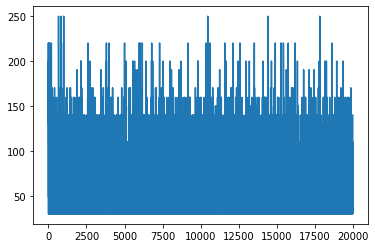

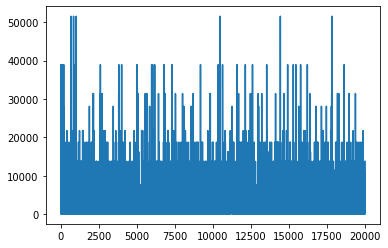

In [ ]:
plt.plot(SINR_iterations1)
plt.show()
plt.plot(cost_iterations1)
plt.show()

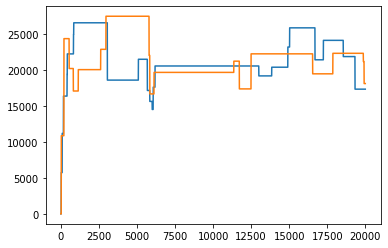

In [ ]:
# Plots 

Q_plot_1 = Q_iterations[1,1,:,0]
Q_plot_2 = Q_iterations[1,1,:,1]

plt.plot(Q_plot_1)
plt.plot(Q_plot_2)
plt.show()

In [ ]:
def moving_average(a):
  l = len(a[:])
  b = np.zeros(l)
  for i in range(l):
    b[i] = np.mean(a[0:i+1])
  return b

In [ ]:
print(np.mean(Q_plot_1[10000:20000]))
print(np.mean(Q_plot_2[10000:20000]))

35017.98877449526
20399.90922564901


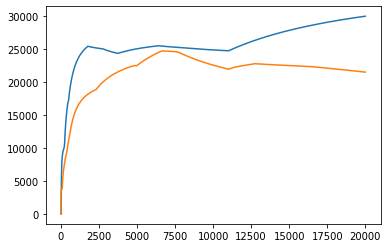

In [ ]:
plt.plot(moving_average(Q_plot_1))
plt.plot(moving_average(Q_plot_2))
plt.show()

In [ ]:
# starting_state = random.randint(len(R[1,:]));
# end_Q = useQ(normalized_Q,starting_state,2)
# end_Q

# Modified Q-Learning

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

# SINR_X_UL
def SINR_X_UL(P_SU):
  P_DTV = 90
  var = 0

  h_DTV = 1
  h_SU = 1  

  return (P_DTV*h_DTV) / (var + np.sum(P_SU*h_SU))


# Costs
def cost(SINR_ij,SINR_th):
  return (SINR_ij - SINR_th)**2

def cost_abs(SINR_ij,SINR_th):
    return abs(SINR_ij - SINR_th)

def cost_4(SINR_ij,SINR_th):
    return (SINR_ij - SINR_th)**4

# p_mat Function
def create_p_mat(current_states,omitted_state,P):
  p_vec = np.zeros(len(current_states))
  for i in range(0,len(current_states)):
    p_vec[i] = P[current_states[i]]
  p_mat = np.zeros((len(P),len(current_states)))
  for i in range(0,len(P)):
    p_mat[i,:] = p_vec
  p_mat[:,omitted_state] = P
  return p_mat


#Parameters
alpha = 0.5
gamma = 0.9
epsilon = 0.1
n_iterations = 6000
P = [-80,-50,-30,10,29.8] # P: set of possible power levels (p), P = {p1...pl}
n_states = len(P)
SINR_th = 23
num_SU = 10


# Q Matrix
Q = np.zeros((n_states,n_states,num_SU))
Q_iterations = np.zeros((n_states,n_states,n_iterations+1,num_SU))


# Reward Matrix
SINR_vec = np.zeros(n_states)
for i in range (0,n_states):
  SINR_vec[i] = SINR_X_UL(P[i])

cost_vec = cost(SINR_vec,SINR_th) # (Difference^2)
# cost_vec = cost_abs(SINR_vec,SINR_th) # (|Difference|)
# cost_vec = cost_4(SINR_vec,SINR_th) # (Difference^4)

R = np.zeros((n_states,n_states,num_SU));



# Q-Learning Algorithm
state = random.randint(len(R[1,:,1]), size=num_SU);
action = np.zeros(num_SU);
for i in range(0,n_iterations):
    for k in range(0,num_SU):
        # Create R matrix holding other states constant
        p_mat = create_p_mat(state,k,P);
        for j in range(0,len(P)):
            SINR_vec[j] = SINR_X_UL(p_mat[j,:]);
        cost_vec = cost(SINR_vec,SINR_th);
        for j in range(0,n_states):
                R[j,:,k] = cost_vec;
        
        # Random Greedy Algorithm choice for next Action
        random_greedy = random.rand(1);
        if random_greedy < epsilon:
            action[k] = random.randint(len(R[1,:,1]));
        else:
            min_Q = np.min(Q[state[k],:,k]);
            possible = np.where(Q[state[k],:,k] == min_Q)
            action[k] =  possible[0][random.randint(len(possible[0]))];

        
        # Calculating Q and Stochastic Gradiant Descent 
        min_next_Q = np.min(Q[int(action[k]),:,k]);
        discount = gamma*min_next_Q;
        delta_Q = alpha*(R[state[k],int(action[k]),k] + discount - Q[state[k],int(action[k]),k]);
        Q[state[k],int(action[k]),k] = Q[state[k],int(action[k]),k] + delta_Q;
        Q_iterations[:,:,i+1,k] = Q[:,:,k];
        state[k] = action[k];

# Normalize final Q table
normalized_Q = np.zeros((n_states,n_states,num_SU))
for k in range(0,num_SU):
  normal_factor = 100/np.max(Q[:,:,k])
  normalized_Q[:,:,k]  = np.rint(normal_factor*Q[:,:,k])

# Plots 

Q_plot_1 = Q_iterations[3,1,:,1]
Q_plot_2 = Q_iterations[1,2,:,4]

plt.plot(Q_plot_1)
plt.plot(Q_plot_2)
plt.show()
# Differences from example: greedy approach, any state can take any action.

# starting_state = randi(length(R(1,:)));
# end_Q = useQ(normalized_Q,starting_state);



# GNU Radio block

In [ ]:
def moving_average(a):
  l = len(a[:])
  for i in range(l):
    b[i] = np.mean(a[0:i+1])
  return b# from gnuradio import gr
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

class QLearning(gr.sync_block): 
  # Hyper-parameters
  self.alpha = 0.5
  self.gamma = 0.9
  self.epsilon = 0.1
  self.n_iterations = 3000
  self.SINR_th = 23 #15 to 20
  self.num_SU = 1
  self.P = [-80,-50,-30,10.1,29.8]
  self.n_states = len(P)

  # self.Gain = [15,16,17,18,19,20]
  # self.Gain = [-20, -10, 10, 15, 17.5, 20, 30, 40, 50]

  # Costs
  # def cost(self,SINR_ij,SINR_th):
  #     return abs(SINR_ij - SINR_th)
  def cost(self,SINR_ij,SINR_th):
    return (SINR_ij - SINR_th)**2
  # def cost(self,SINR_i  j,SINR_th):
  #     return (SINR_ij - SINR_th)**4

  # SINR_X_UL
  def SINR_X_UL(self,P_SU): 
    P_PU = 1
    return P_PU - np.sum(P_SU) # should be subtraction

  # p_mat Function
  def create_p_mat(self,current_states,omitted_state,P):
    p_vec = np.zeros(len(current_states))
    for i in range(0,len(current_states)):
      p_vec[i] = P[current_states[i]]
    p_mat = np.zeros((len(P),len(current_states)))
    for i in range(0,len(P)):
      p_mat[i,:] = p_vec
    p_mat[:,omitted_state] = P
    return p_mat

  # Final State Function
  def useQ(self,Q,starting_state,SU):
    final_state = starting_state
    for i in range(0,10):
        min_Q = np.min(Q[final_state,:,SU])
        possible = np.where(Q[final_state,:,SU] == min_Q)
        action = possible[0][random.randint(len(possible[0]))]
        if (Q[final_state,action,SU] == Q.min()):
            return action
        else:
            return action

  def __init__(self,*args,**kwargs):  
    gr.sync_block.__init__(self, name='QLearning', in_sig=[complex], out_sig=[complex])
    # Q Matrix
    self.Q = np.zeros((self.n_states,self.n_states,self.num_SU))
    self.Q_iterations = np.zeros((self.n_states,self.n_states,self.n_iterations+1,self.num_SU))

    # SINR Vector
    self.SINR_vec = np.zeros(self.n_states)
    for i in range (0,self.n_states):
      self.SINR_vec[i] = self.SINR_X_UL(P[i])

    # Cost Vector
    # self.cost_vec = self.cost(self.SINR_vec,self.SINR_th) # (|Difference|)
    self.cost_vec = self.cost(self.SINR_vec,self.SINR_th) # (Difference^2)
    # self.cost_vec = self.cost(self.SINR_vec,self.SINR_th) # (Difference^4)

    # Reward Matrix
    self.R = np.zeros((self.n_states,self.n_states,self.num_SU));


  # figure out the for loop stuff bro
  def work(self, in_SINR, out_power):
    # Q-Learning Algorithm
    state = random.randint(len(self.R[1,:,1]), size=self.num_SU);
    action = np.zeros(self.num_SU);
    for i in range(0,self.n_iterations):
        for k in range(0,self.num_SU):
          # Create R matrix holding other states constant
          p_mat = self.create_p_mat(state,k,self.P);
          for j in range(0,self.n_states):
            self.SINR_vec[j] = self.SINR_X_UL(p_mat[j,:]);

          self.cost_vec = self.cost(self.SINR_vec,self.SINR_th);
          for j in range(0,self.n_states):
            self.R[j,:,k] = self.cost_vec;
          
          # Random Greedy Algorithm choice for next Action
          random_greedy = random.rand(1);
          if random_greedy < epsilon:
            action[k] = random.randint(len(self.R[1,:,1]));
          else:
            self.Q[np.isnan(self.Q)] = 0
            min_Q = np.min(self.Q[state[k],:,k]);
            possible = np.where(self.Q[state[k],:,k] == min_Q)
            action[k] =  possible[0][random.randint(len(possible[0]))];

          
          # Calculating Q and Stochastic Gradiant Descent 
          min_next_Q = np.min(self.Q[int(action[k]),:,k]);
          discount = self.gamma*min_next_Q;
          delta_Q = self.alpha*(self.R[state[k],int(action[k]),k] + discount - self.Q[state[k],int(action[k]),k]);
          self.Q[state[k],int(action[k]),k] = self.Q[state[k],int(action[k]),k] + delta_Q;
          self.Q_iterations[:,:,i+1,k] = self.Q[:,:,k];
          state[k] = action[k];

    # Normalize final Q table
    normalized_Q = np.zeros((n_states,n_states,num_SU))
    for k in range(0,self.num_SU):
      normal_factor = 100/np.max(Q[:,:,k])
      normalized_Q[:,:,k]  = np.rint(normal_factor*self.Q[:,:,k])

    # out 

    # Plots 
    Q_plot_1 = Q_iterations[3,1,:,0]
    plt.plot(Q_plot_1)
    plt.show()